In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [7]:
X = 6* np.random.rand( 200,1) -3
y= 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

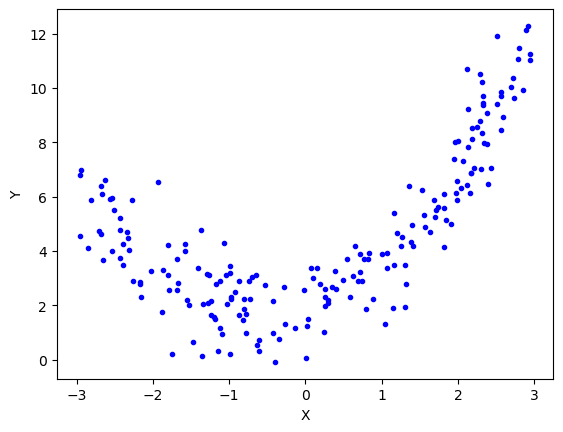

In [9]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [13]:
# applyin linear regression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.26052443525158253

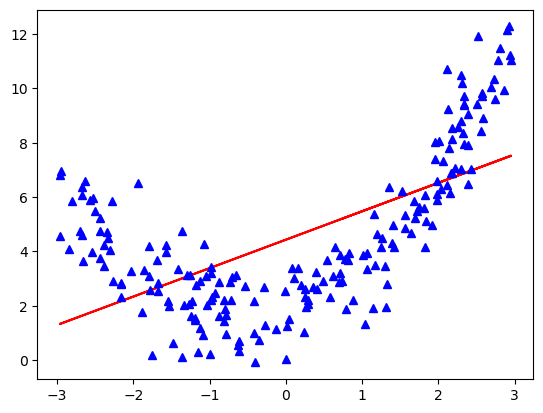

In [28]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,"b^")

In [30]:
# Applying polynomial regression
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [34]:
X_train_trans[0] #-> b1 + b2 x + b3 x^2

array([1.        , 2.94426715, 8.66870907])

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(X_test_trans)

In [38]:
r2_score(y_test,y_pred)

0.8247683658415326

In [39]:
lr.coef_

array([[0.        , 0.86681251, 0.81991423]])

In [40]:
lr.intercept_

array([1.91233752])

In [41]:
 X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

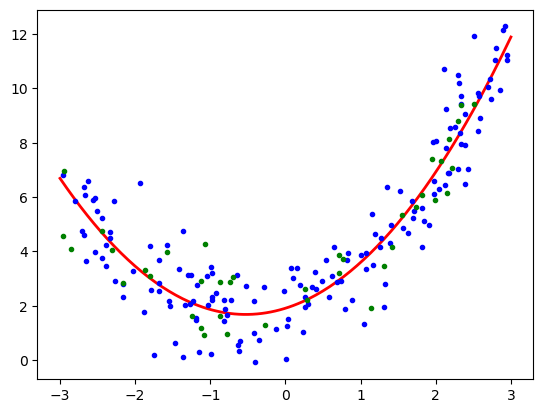

In [46]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train,y_train,"b.")
plt.plot(X_test,y_test,'g.')

In [61]:
# custom function
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

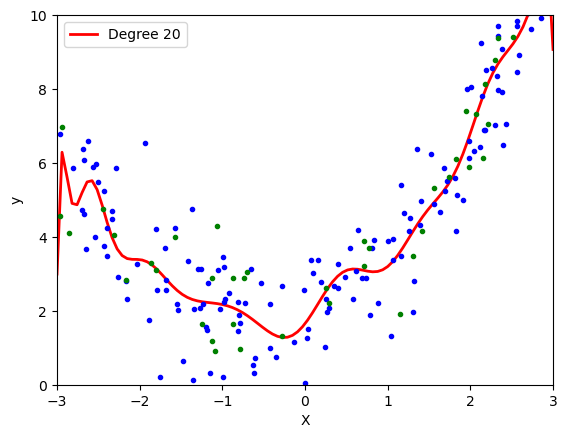

In [60]:
polynomial_regression(20)

In [62]:
poly.powers_

array([[0],
       [1],
       [2]])